In [ ]:
#Instalación de la librería gseapy
pip install gseapy

In [ ]:
#Instalación de la librería matplotlib
pip install matplotlib

In [ ]:
#Instalación de wget
pip install wget

In [3]:
#Importo las librerías a usar
import pandas as pd
import wget
import matplotlib.pyplot as plt
import numpy as np
import gseapy as gp




In [ ]:
#Descargo el set de datos
url='https://raw.githubusercontent.com/jfmaggio/tp_final_programacion/main/GSE113469.top.table.csv'

wget.download(url)

In [20]:
#Los datos descargados los cargo en un dataframe


genes_principal = pd.read_csv('GSE113469.top.table.csv', on_bad_lines='skip')
print(genes_principal.head(n=25)) #Imprimo las primeras 25 lineas del dataframe


              ID     adj.P.Val     logFC           GI Gene.symbol  \
0   ILMN_1705985  1.900000e-16 -1.051645  299782545.0        PIGA   
1   ILMN_1752213  2.360000e-16  0.999460  197304734.0      TMEM60   
2   ILMN_1779616  2.710000e-16  1.069260  289547208.0      SUCLG1   
3   ILMN_1798543  1.560000e-15 -1.479704  217416412.0      STK17B   
4   ILMN_1745620  3.810000e-15  1.122110  751868084.0       KRCC1   
5   ILMN_1725862  3.810000e-15 -0.826279  375493563.0        USP3   
6   ILMN_1671281  1.040000e-14  0.764720  315221148.0      RNASEL   
7   ILMN_1756767  1.260000e-14  0.642478   84043962.0       EIF5B   
8   ILMN_2329429  1.360000e-14  1.272867          NaN         NaN   
9   ILMN_1689704  1.390000e-14  0.733608  503774416.0       TMEM5   
10  ILMN_2343624  1.400000e-14  1.080134   55956897.0     METTL13   
11  ILMN_1813938  1.940000e-14  0.747133  148612891.0      CHCHD4   
12  ILMN_3200330  2.080000e-14  1.052517          NaN         NaN   
13  ILMN_2162328  3.560000e-14 -1.

In [21]:
#Averigo el rango de valores de los datos
print('El mínimo de valores de la columna adj.P.Value es:', genes_principal['adj.P.Val'].min(), 'y el máximo es: ', genes_principal['adj.P.Val'].max())
print('El mínimo de valores de la columna logFC es:', genes_principal['logFC'].min(), 'y el máximo es: ', genes_principal['logFC'].max())
print('El mínimo de valores de la columna GI es:', genes_principal['GI'].min(), 'y el máximo es: ', genes_principal['GI'].max())


El mínimo de valores de la columna adj.P.Value es: 1.9e-16 y el máximo es:  1.0
El mínimo de valores de la columna logFC es: -2.26534263 y el máximo es:  2.22930726
El mínimo de valores de la columna GI es: 36748.0 y el máximo es:  1047226013.0


In [22]:
#Para ver que tipo de datos tiene el dataframe
genes_principal.map(type).apply(set)

ID                              {<class 'str'>}
adj.P.Val                     {<class 'float'>}
logFC                         {<class 'float'>}
GI                            {<class 'float'>}
Gene.symbol    {<class 'float'>, <class 'str'>}
Gene.title     {<class 'float'>, <class 'str'>}
dtype: object

In [23]:
genes_principal['ID'].count() 

44158

In [24]:
genes_principal['Gene.symbol'].isnull().sum() #Chequeo cuantos nombres de genes faltan

16049

In [25]:
genes_principal['ID'].count()#Chequeo cuantos nombres de genes hay

44158

In [26]:
#Saco las filas con NaN
genes_principal = genes_principal.dropna(subset=['Gene.symbol'])

In [27]:
genes_principal['ID'].count()#Chequeo cuantos nombres de genes hay

28109

In [28]:
print(genes_principal.head(n=25)) #Imprimo las primeras 25 lineas del dataframe

              ID     adj.P.Val     logFC           GI Gene.symbol  \
0   ILMN_1705985  1.900000e-16 -1.051645  299782545.0        PIGA   
1   ILMN_1752213  2.360000e-16  0.999460  197304734.0      TMEM60   
2   ILMN_1779616  2.710000e-16  1.069260  289547208.0      SUCLG1   
3   ILMN_1798543  1.560000e-15 -1.479704  217416412.0      STK17B   
4   ILMN_1745620  3.810000e-15  1.122110  751868084.0       KRCC1   
5   ILMN_1725862  3.810000e-15 -0.826279  375493563.0        USP3   
6   ILMN_1671281  1.040000e-14  0.764720  315221148.0      RNASEL   
7   ILMN_1756767  1.260000e-14  0.642478   84043962.0       EIF5B   
9   ILMN_1689704  1.390000e-14  0.733608  503774416.0       TMEM5   
10  ILMN_2343624  1.400000e-14  1.080134   55956897.0     METTL13   
11  ILMN_1813938  1.940000e-14  0.747133  148612891.0      CHCHD4   
13  ILMN_2162328  3.560000e-14 -1.245917  164663900.0         PTS   
14  ILMN_1669584  3.820000e-14 -0.926402  212549550.0        ILF3   
15  ILMN_1746135  3.820000e-14  0.

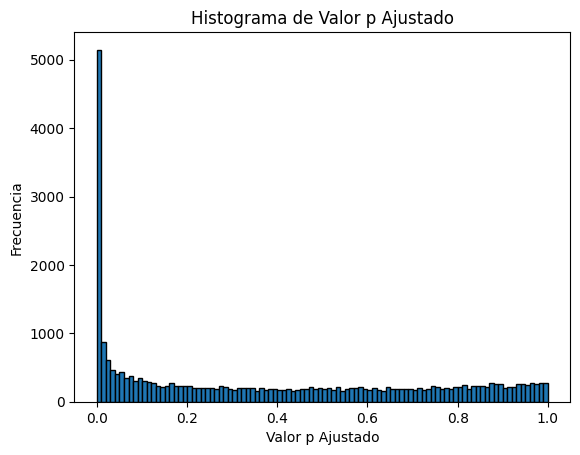

In [29]:
#Creo un histograma con las frecuencias de los valores p ajustados
plt.hist(genes_principal['adj.P.Val'], bins=100, edgecolor='black')


plt.xlabel('Valor p Ajustado')
plt.ylabel('Frecuencia')
plt.title('Histograma de Valor p Ajustado')
plt.savefig( 'Histograma.png', bbox_inches='tight')

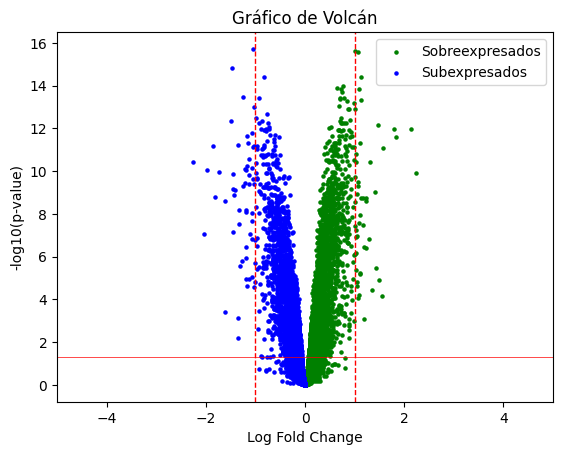

In [30]:
#Se crea un grafico de volcan para visualizar los genes diferencialmente expresados, y se colocan ineas delimiando los que seran filtrados
# Separo los genes sobreexpresados y subexpresados respecto de los controles
sob = genes_principal.loc[genes_principal['logFC'] > 0]
sub = genes_principal.loc[genes_principal['logFC'] < 0]

#Calculo el -log(p austado)
neg_logpvalue_sob = -np.log10(sob['adj.P.Val'])
neg_logpvalue_sub = -np.log10(sub['adj.P.Val'])


# Dibujar los genes sobreexpresados y subexpresados con colores diferentes
plt.scatter(sob['logFC'], neg_logpvalue_sob, color='green', label='Sobreexpresados', alpha=1, s=5)
plt.scatter(sub['logFC'], neg_logpvalue_sub, color='blue', label='Subexpresados', alpha=1, s=5)

# Establecer los límites y etiquetas de los ejes
plt.xlim(-5, 5)

plt.xlabel('Log Fold Change')
plt.ylabel('-log10(p-value)')
plt.title('Gráfico de Volcán')

# Añado una línea para resaltar los genes significativamente diferencialmente expresados
threshold = -np.log10(0.05)
plt.axhline(y=threshold, color='red', linestyle='-', linewidth=0.5)

# Añado líneas verticales para resaltar los genes diferencialmente expresados con |logFC| > 1
plt.axvline(x=1, color='red', linestyle='--', linewidth=1)  # Ejemplo de línea vertical en x=1
plt.axvline(x=-1, color='red', linestyle='--', linewidth=1)  # Ejemplo de línea vertical en x=-1


# Añadir leyenda
plt.legend()

plt.savefig( 'graf_volcan.png', bbox_inches='tight')

In [31]:
%load_ext autoreload
%autoreload 2
#Importo las librerías
import pandas as pd
import gseapy as gp


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
#Filtro por adj.P.Val, los menores a 0.05
genes_principal = genes_principal[genes_principal['adj.P.Val'] < 0.05]
#Cuento cuantos genes quedan
print("Después del filtrado quedan", genes_principal['Gene.symbol'].count(), "genes")

Después del filtrado quedan 7513 genes


In [33]:
#Ahora armo dos dataframes, uno con los genes sobreexpresados con expresión ayor a 1 (logFC > 1) y el otro con los subexpresados con expresión menor a -1 (logFC < (-1)).
genes_sob_mayoresa1 = genes_principal[genes_principal['logFC'] > 1]

genes_sub_menoresa1 = genes_principal[genes_principal['logFC'] < (-1)]

#Cuento cuantos genes quedan
print("Después del filtrado por LogFC quedan", genes_sob_mayoresa1['Gene.symbol'].count(), "genes sobreexpresados y ", genes_sub_menoresa1['Gene.symbol'].count(), "genes subexpresados respecto de los controles.")


Después del filtrado por LogFC quedan 49 genes sobreexpresados y  56 genes subexpresados respecto de los controles.


In [34]:
#Checkeo los dataframes creados
genes_sob_mayoresa1.head()

,ID,adj.P.Val,logFC,GI,Gene.symbol,Gene.title
2,ILMN_1779616,2.710000e-16,1.069260,289547208.0,SUCLG1,succinate-CoA ligase alpha subunit
4,ILMN_1745620,3.810000e-15,1.122110,751868084.0,KRCC1,lysine rich coiled-coil 1
10,ILMN_2343624,1.400000e-14,1.080134,55956897.0,METTL13,methyltransferase like 13
19,ILMN_1718718,4.510000e-14,1.119966,393290879.0,MKKS,McKusick-Kaufman syndrome
25,ILMN_2413084,1.200000e-13,1.003202,527498290.0,HSPA8,heat shock protein family A (Hsp70) member 8


In [35]:
#Checkeo los dataframes creados
genes_sub_menoresa1.head()

,ID,adj.P.Val,logFC,GI,Gene.symbol,Gene.title
0,ILMN_1705985,1.900000e-16,-1.051645,299782545.0,PIGA,phosphatidylinositol glycan anchor biosynthesi...
3,ILMN_1798543,1.560000e-15,-1.479704,217416412.0,STK17B,serine/threonine kinase 17b
13,ILMN_2162328,3.560000e-14,-1.245917,164663900.0,PTS,6-pyruvoyltetrahydropterin synthase
23,ILMN_2244547,9.760000e-14,-1.025393,87298842.0,ETNK1,ethanolamine kinase 1
31,ILMN_1710514,4.330000e-13,-1.491383,164664507.0,BCL3,B-cell CLL/lymphoma 3


In [36]:
#Ya habiendo hecho los filtrados correspondientes, hago el análisis de enriquecmiento de los genes sobreexpresados respecto de los controles.
enr_sob = gp.enrichr(gene_list=genes_sob_mayoresa1['Gene.symbol'], 
                 gene_sets=['GO_Biological_Process_2023','GO_Cellular_Component_2023', 'GO_Molecular_Function_2023', 'KEGG_2021_Human'],
                 organism='human', 
                 outdir=None,
                )

In [47]:
#Importo la funciones de gsapy para graficar
from gseapy import barplot, dotplot

C:\Users\julian\AppData\Local\Programs\Python\Python311\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
C:\Users\julian\AppData\Local\Programs\Python\Python311\Lib\site-packages\gseapy\plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


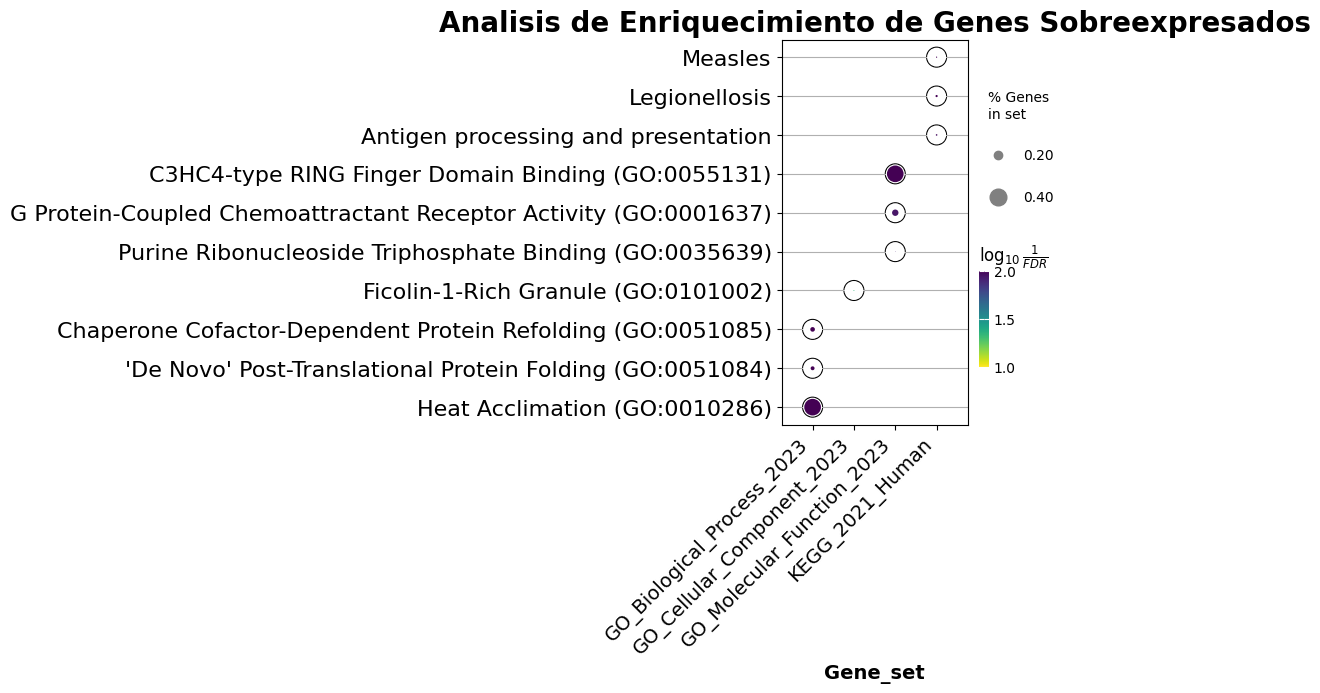

In [48]:
#Se grafican los resultados obtenidos para los genes sobreexpresados, usando un gráfico de puntos
ax_sob = dotplot(enr_sob.results,
              column="Adjusted P-value",
              x='Gene_set', 
              size=5,
              top_term=3,
              figsize=(3,5),
              title = "Analisis de Enriquecimiento de Genes Sobreexpresados",
              xticklabels_rot=45,
              show_ring=True, 
              marker='o',
             )
plt.savefig( 'puntos_sob.png', bbox_inches='tight')

C:\Users\julian\AppData\Local\Programs\Python\Python311\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
C:\Users\julian\AppData\Local\Programs\Python\Python311\Lib\site-packages\gseapy\plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


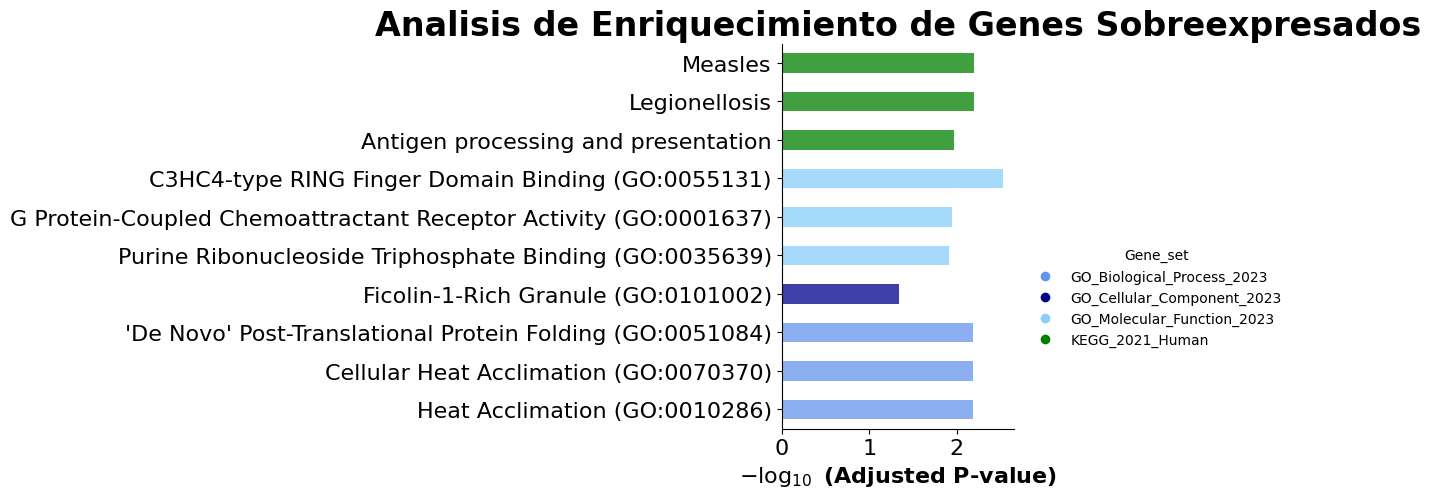

In [23]:
#Se grafican los resultados obtenidos para los genes sobreexpresados, usando un gráfico de barras
bar_sob = barplot(enr_sob.results,
              column="Adjusted P-value",
              group='Gene_set',
              size=5,
              top_term=3,
              figsize=(3,5),
              title = "Analisis de Enriquecimiento de Genes Sobreexpresados",
              color = {'GO_Biological_Process_2023': 'cornflowerblue', 'GO_Cellular_Component_2023':'darkblue', 'GO_Molecular_Function_2023':'lightskyblue', 'KEGG_2021_Human':'green'}
             )
plt.savefig( 'barras_sob.png', bbox_inches='tight')

In [34]:
enr_sob.results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Chaperone Cofactor-Dependent Protein Refolding...,3/27,0.000028,0.006550,0,0,60.768293,637.043969,HSPA8;HSPA6;HSPA1A
1,GO_Biological_Process_2023,Heat Acclimation (GO:0010286),2/5,0.000047,0.006550,0,0,316.714286,3155.487949,HSPA6;HSPA1A
2,GO_Biological_Process_2023,Cellular Heat Acclimation (GO:0070370),2/5,0.000047,0.006550,0,0,316.714286,3155.487949,HSPA6;HSPA1A
3,GO_Biological_Process_2023,'De Novo' Post-Translational Protein Folding (...,3/32,0.000047,0.006550,0,0,50.278385,500.909951,HSPA8;HSPA6;HSPA1A
4,GO_Biological_Process_2023,Response To Unfolded Protein (GO:0006986),3/44,0.000124,0.013737,0,0,35.541344,319.836861,HSPA8;HSPA6;HSPA1A
...,...,...,...,...,...,...,...,...,...,...
726,KEGG_2021_Human,Human papillomavirus infection,1/331,0.520537,0.567859,0,0,1.383087,0.903009,LFNG
727,KEGG_2021_Human,Alzheimer disease,1/369,0.559688,0.597000,0,0,1.237867,0.718429,FRAT2
728,KEGG_2021_Human,Pathways of neurodegeneration,1/475,0.653114,0.681510,0,0,0.955843,0.407193,FRAT2
729,KEGG_2021_Human,Herpes simplex virus 1 infection,1/498,0.670664,0.684934,0,0,0.910533,0.363746,OAS2


In [49]:
enr_sob.results=enr_sob.results.sort_values(by = "Adjusted P-value")

enr_sob.results[['Gene_set', 'Term', 'Overlap', 'Adjusted P-value']].head(n=25)


,Gene_set,Term,Overlap,Adjusted P-value
620,GO_Molecular_Function_2023,C3HC4-type RING Finger Domain Binding (GO:0055...,2/5,0.002967
684,KEGG_2021_Human,Legionellosis,3/57,0.006421
683,KEGG_2021_Human,Measles,4/139,0.006421
2,GO_Biological_Process_2023,Cellular Heat Acclimation (GO:0070370),2/5,0.006550
1,GO_Biological_Process_2023,Heat Acclimation (GO:0010286),2/5,0.006550
3,GO_Biological_Process_2023,'De Novo' Post-Translational Protein Folding (...,3/32,0.006550
0,GO_Biological_Process_2023,Chaperone Cofactor-Dependent Protein Refolding...,3/27,0.006550
685,KEGG_2021_Human,Antigen processing and presentation,3/78,0.010777
621,GO_Molecular_Function_2023,G Protein-Coupled Chemoattractant Receptor Act...,2/13,0.011444
688,KEGG_2021_Human,Longevity regulating pathway,3/102,0.011723


In [66]:
enr_sob.results[enr_sob.results['Gene_set'] == "GO_Biological_Process_2023"].head(n=3)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
2,GO_Biological_Process_2023,Cellular Heat Acclimation (GO:0070370),2/5,0.000047,0.00655,0,0,316.714286,3155.487949,HSPA6;HSPA1A
1,GO_Biological_Process_2023,Heat Acclimation (GO:0010286),2/5,0.000047,0.00655,0,0,316.714286,3155.487949,HSPA6;HSPA1A
3,GO_Biological_Process_2023,'De Novo' Post-Translational Protein Folding (...,3/32,0.000047,0.00655,0,0,50.278385,500.909951,HSPA8;HSPA6;HSPA1A


In [69]:
enr_sob.results[enr_sob.results['Gene_set'] == "GO_Cellular_Component_2023"].head(n=3)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
556,GO_Cellular_Component_2023,Ficolin-1-Rich Granule (GO:0101002),4/184,0.000706,0.045190,0,0,10.986667,79.716629,HSPA8;HSPA6;DYNLL1;HSPA1A
557,GO_Cellular_Component_2023,Ficolin-1-Rich Granule Lumen (GO:1904813),3/123,0.002501,0.080038,0,0,12.095122,72.461793,HSPA8;HSPA6;HSPA1A
562,GO_Cellular_Component_2023,Clathrin-Sculpted Gamma-Aminobutyric Acid Tran...,1/7,0.015301,0.139894,0,0,77.325581,323.208935,HSPA8


In [70]:
enr_sob.results[enr_sob.results['Gene_set'] == "GO_Molecular_Function_2023"].head(n=3)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
620,GO_Molecular_Function_2023,C3HC4-type RING Finger Domain Binding (GO:0055...,2/5,0.000047,0.002967,0,0,316.714286,3155.487949,HSPA8;HSPA1A
621,GO_Molecular_Function_2023,G Protein-Coupled Chemoattractant Receptor Act...,2/13,0.000363,0.011444,0,0,86.341991,683.850896,CX3CR1;CCR2
622,GO_Molecular_Function_2023,Purine Ribonucleoside Triphosphate Binding (GO...,6/476,0.000577,0.012124,0,0,6.546249,48.816148,HSPA8;CDK11A;OAS2;GBP1;RHOB;HSPA1A


In [71]:
enr_sob.results[enr_sob.results['Gene_set'] == "KEGG_2021_Human"].head(n=3)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
684,KEGG_2021_Human,Legionellosis,3/57,0.000268,0.006421,0,0,26.967480,221.841804,HSPA8;HSPA6;HSPA1A
683,KEGG_2021_Human,Measles,4/139,0.000244,0.006421,0,0,14.682222,122.105790,HSPA8;OAS2;HSPA6;HSPA1A
685,KEGG_2021_Human,Antigen processing and presentation,3/78,0.000674,0.010777,0,0,19.396098,141.648482,HSPA8;HSPA6;HSPA1A


In [50]:
#Ya habiendo hecho los filtrados correspondientes, hago el análisis de enriquecmiento de los genes subexpresados respecto de los controles.
enr_sub = gp.enrichr(gene_list=genes_sub_menoresa1['Gene.symbol'], 
                 gene_sets=['GO_Biological_Process_2023','GO_Cellular_Component_2023', 'GO_Molecular_Function_2023', 'KEGG_2021_Human'],
                 organism='human', 
                 outdir=None,
                )

C:\Users\julian\AppData\Local\Programs\Python\Python311\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
C:\Users\julian\AppData\Local\Programs\Python\Python311\Lib\site-packages\gseapy\plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


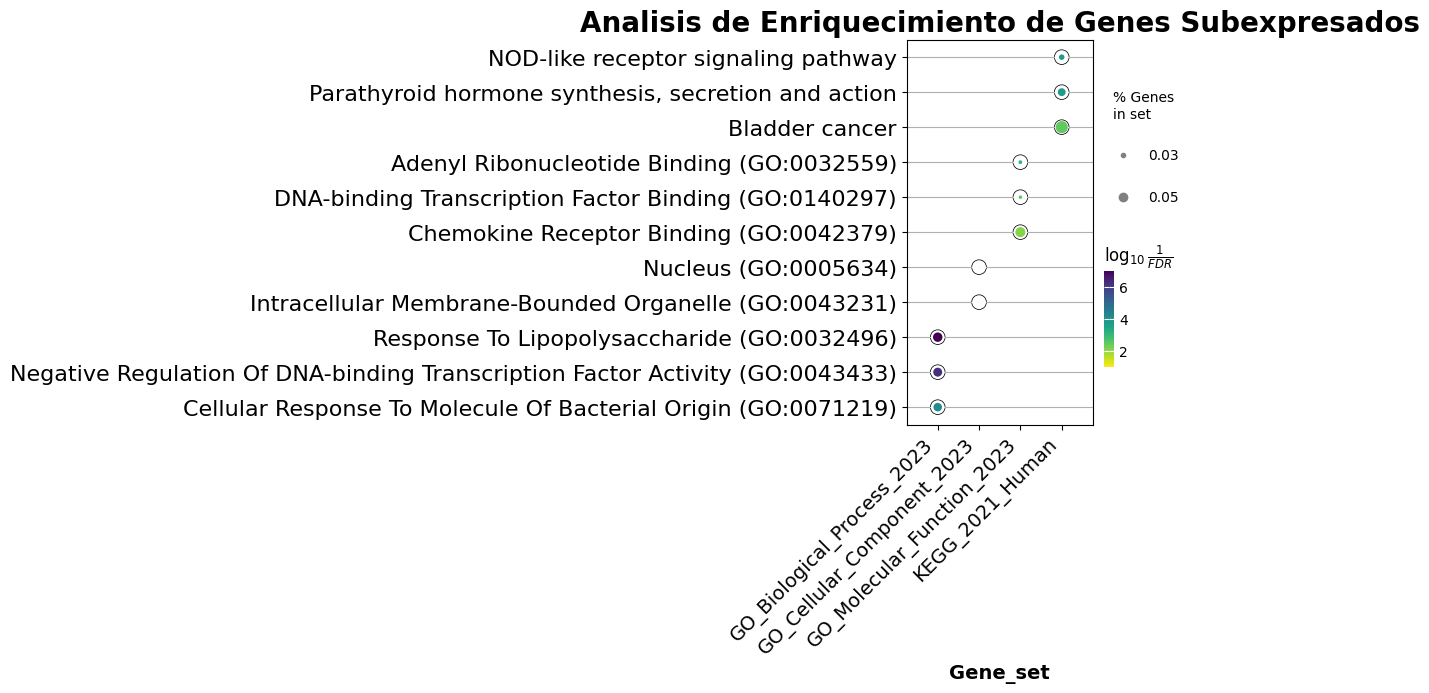

In [39]:
#Se grafican los resultados obtenidos para los genes subexpresados, usando un gráfico de puntos
ax_sub = dotplot(enr_sub.results,
              column="Adjusted P-value",
              x='Gene_set', 
              size=20,
              top_term=3,
              figsize=(3,5),
              title = "Analisis de Enriquecimiento de Genes Subexpresados",
              xticklabels_rot=45,
              show_ring=True, 
              marker='o',
             )
plt.savefig( 'puntos_sub.png', bbox_inches='tight')

C:\Users\julian\AppData\Local\Programs\Python\Python311\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
C:\Users\julian\AppData\Local\Programs\Python\Python311\Lib\site-packages\gseapy\plot.py:689: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


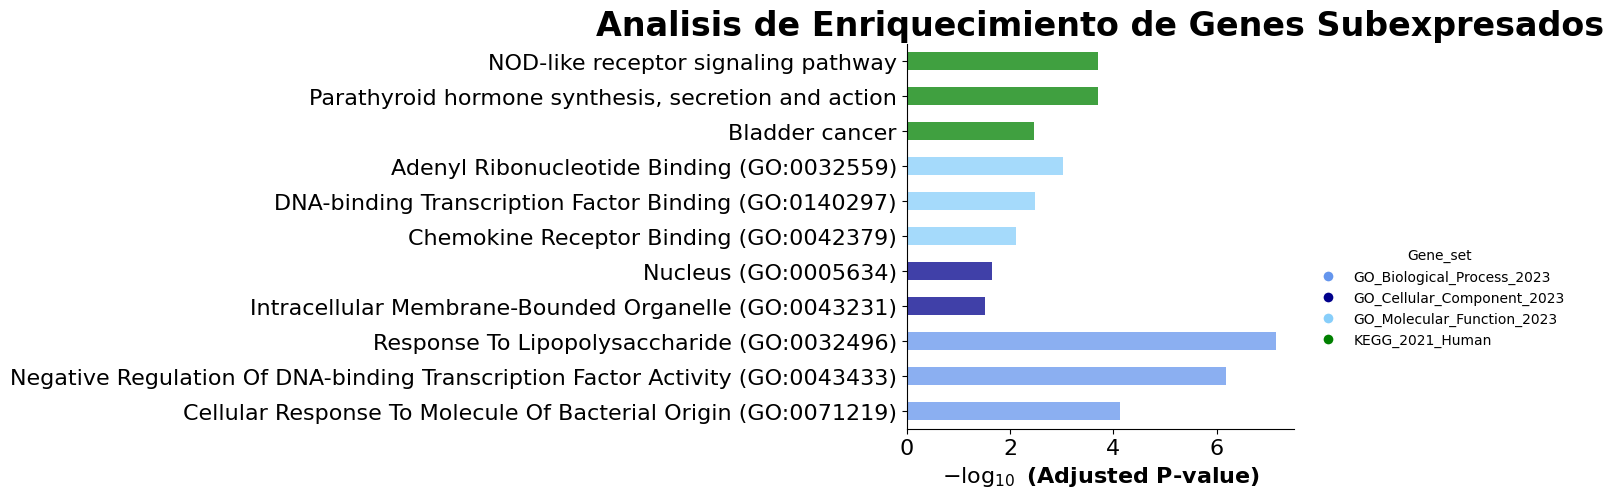

In [44]:
#Se grafican los resultados obtenidos para los genes subexpresados, usando un gráfico de barras
bar_sub = barplot(enr_sub.results,
              column="Adjusted P-value",
              group='Gene_set',
              size=5,
              top_term=3,
              figsize=(5,5),
              title = "Analisis de Enriquecimiento de Genes Subexpresados",
              color = {'GO_Biological_Process_2023': 'cornflowerblue', 'GO_Cellular_Component_2023':'darkblue', 'GO_Molecular_Function_2023':'lightskyblue', 'KEGG_2021_Human':'green'}
             )
plt.savefig( 'barras_sub.png', bbox_inches='tight')

In [27]:
enr_sub.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Response To Lipopolysaccharide (GO:0032496),9/159,8.651226e-11,7.258379e-08,0,0,32.114595,744.118760,CXCL8;ZC3H12A;PELI1;PDE4B;TNFAIP3;NLRP3;CCL2;I...
1,GO_Biological_Process_2023,Negative Regulation Of DNA-binding Transcripti...,8/149,1.612739e-09,6.765441e-07,0,0,29.582680,598.911171,BHLHE40;BCL3;ZC3H12A;TNFAIP3;NLRP3;SIK1;IRAK3;...
2,GO_Biological_Process_2023,Cellular Response To Molecule Of Bacterial Ori...,6/117,2.725607e-07,7.622614e-05,0,0,26.814865,405.317531,CXCL8;ZC3H12A;PDE4B;TNFAIP3;NLRP3;CCL2
3,GO_Biological_Process_2023,Cellular Response To Lipopolysaccharide (GO:00...,6/124,3.845039e-07,8.064969e-05,0,0,25.215254,372.462386,CXCL8;ZC3H12A;PDE4B;TNFAIP3;NLRP3;CCL2
4,GO_Biological_Process_2023,Response To Molecule Of Bacterial Origin (GO:0...,5/69,5.180208e-07,8.692388e-05,0,0,37.900152,548.538401,CXCL8;PELI1;TNFAIP3;IRAK3;TRIB1


In [61]:
enr_sub.results=enr_sub.results.sort_values(by = "Adjusted P-value")

enr_sub.results[enr_sub.results['Gene_set'] == "GO_Cellular_Component_2023"].head(n=3)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
839,GO_Cellular_Component_2023,Nucleus (GO:0005634),21/4487,0.000409,0.022889,0,0,2.913103,22.729341,TSPYL2;CSRNP1;PDE4D;IRF2BP2;TNFAIP3;CXCR4;IRAK...
840,GO_Cellular_Component_2023,Intracellular Membrane-Bounded Organelle (GO:0...,22/5175,0.001099,0.030760,0,0,2.632948,17.940247,TSPYL2;CSRNP1;PDE4D;IRF2BP2;TNFAIP3;CXCR4;IRAK...
841,GO_Cellular_Component_2023,Voltage-Gated Calcium Channel Complex (GO:0005...,2/49,0.005682,0.106057,0,0,19.252418,99.544965,PDE4D;PDE4B


In [62]:
enr_sub.results[enr_sub.results['Gene_set'] == "GO_Biological_Process_2023"].head(n=3)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Response To Lipopolysaccharide (GO:0032496),9/159,8.651226e-11,7.258379e-08,0,0,32.114595,744.118760,CXCL8;ZC3H12A;PELI1;PDE4B;TNFAIP3;NLRP3;CCL2;I...
1,GO_Biological_Process_2023,Negative Regulation Of DNA-binding Transcripti...,8/149,1.612739e-09,6.765441e-07,0,0,29.582680,598.911171,BHLHE40;BCL3;ZC3H12A;TNFAIP3;NLRP3;SIK1;IRAK3;...
2,GO_Biological_Process_2023,Cellular Response To Molecule Of Bacterial Ori...,6/117,2.725607e-07,7.622614e-05,0,0,26.814865,405.317531,CXCL8;ZC3H12A;PDE4B;TNFAIP3;NLRP3;CCL2


In [64]:
enr_sub.results[enr_sub.results['Gene_set'] == "GO_Molecular_Function_2023"].head(n=3)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
895,GO_Molecular_Function_2023,Adenyl Ribonucleotide Binding (GO:0032559),7/309,0.000006,0.000947,0,0,11.679742,139.923346,PDE4D;STK17B;PDE4B;NLRP3;SIK1;IRAK3;TRIB1
896,GO_Molecular_Function_2023,DNA-binding Transcription Factor Binding (GO:0...,6/282,0.000043,0.003281,0,0,10.694565,107.413568,BHLHE40;BCL3;NLRP3;SIK1;TRIB1;HIF1A
898,GO_Molecular_Function_2023,Chemokine Receptor Binding (GO:0042379),3/50,0.000207,0.007810,0,0,29.550223,250.683702,CXCL8;CCL2;CXCL16


In [65]:
enr_sub.results[enr_sub.results['Gene_set'] == "KEGG_2021_Human"].head(n=3)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
1047,KEGG_2021_Human,"Parathyroid hormone synthesis, secretion and a...",5/106,0.000004,0.000197,0,0,23.971263,295.741187,NR4A2;MAFB;PDE4D;PDE4B;HBEGF
1046,KEGG_2021_Human,NOD-like receptor signaling pathway,6/181,0.000004,0.000197,0,0,16.953429,212.949364,GABARAPL1;CXCL8;NAMPT;TNFAIP3;NLRP3;CCL2
1048,KEGG_2021_Human,Bladder cancer,3/41,0.000114,0.003425,0,0,36.565483,331.936404,CXCL8;THBS1;HBEGF
